# CIRFAR Image

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

TensorFlow version: 2.10.0
170498071/170498071 [==============================] - 24s 0us/step


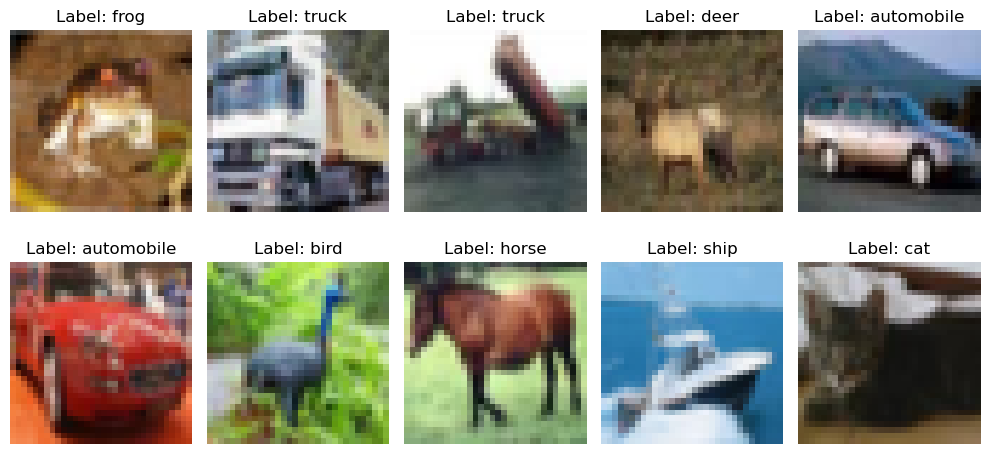

In [2]:
# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 10 images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
    plt.imshow(train_images[i])
    plt.title(f"Label: {class_names[train_labels[i][0]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [3]:
# Build a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes (airplane, automobile, etc.)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Multiclass classification loss
              metrics=['accuracy'])

In [5]:
# Train the model
model.fit(train_images, train_labels, epochs=1)

1563/1563 [==============================] - 18s 11ms/step - loss: 1.5280 - accuracy: 0.4421


In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 2s 6ms/step - loss: 1.2787 - accuracy: 0.5411
Test Accuracy: 0.541100025177002


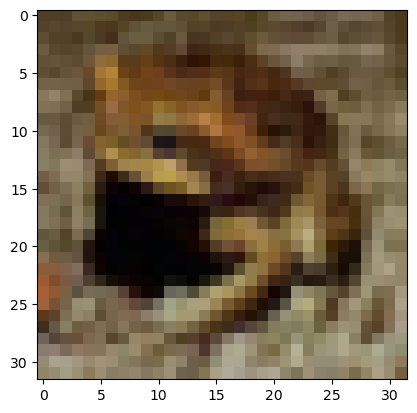

In [7]:
# Predict the label of one image
test_image = test_images[300]  # Choose an image from the test set
plt.imshow(test_image)
plt.show()

In [8]:
# Add an extra dimension to match the input shape of the model (1, 32, 32, 3)
test_image = np.expand_dims(test_image, axis=0)

# Predict the label of the image
result = model.predict(test_image)
predicted_class = class_names[np.argmax(result)]

print(f"Prediction: {predicted_class}")

1/1 [==============================] - 0s 165ms/step
Prediction: frog


1/1 [==============================] - 0s 34ms/step


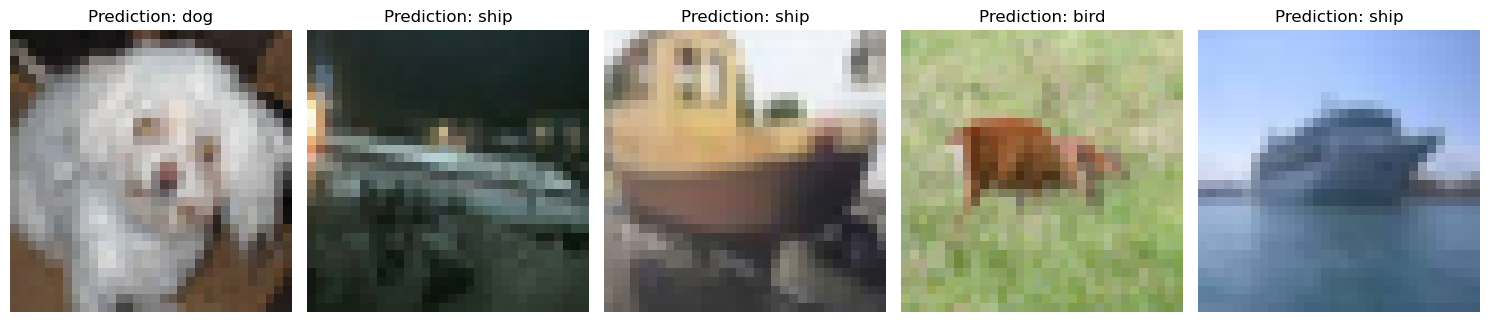

In [9]:
# Display and predict the labels of 5 images from the test set
plt.figure(figsize=(15, 8))
for i in range(5):
    test_image = test_images[i + 1000]  # Selecting different images from the test set
    plt.subplot(1, 5, i + 1)  # Create a row of 5 images
    plt.imshow(test_image)
    plt.axis('off')

    # Add an extra dimension to match the input shape of the model (1, 32, 32, 3)
    test_image_exp = np.expand_dims(test_image, axis=0)

    # Predict the label of the image
    result = model.predict(test_image_exp)
    predicted_class = class_names[np.argmax(result)]
    plt.title(f"Prediction: {predicted_class}")

plt.tight_layout()
plt.show()

# MNIST Image

In [10]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

11490434/11490434 [==============================] - 2s 0us/step


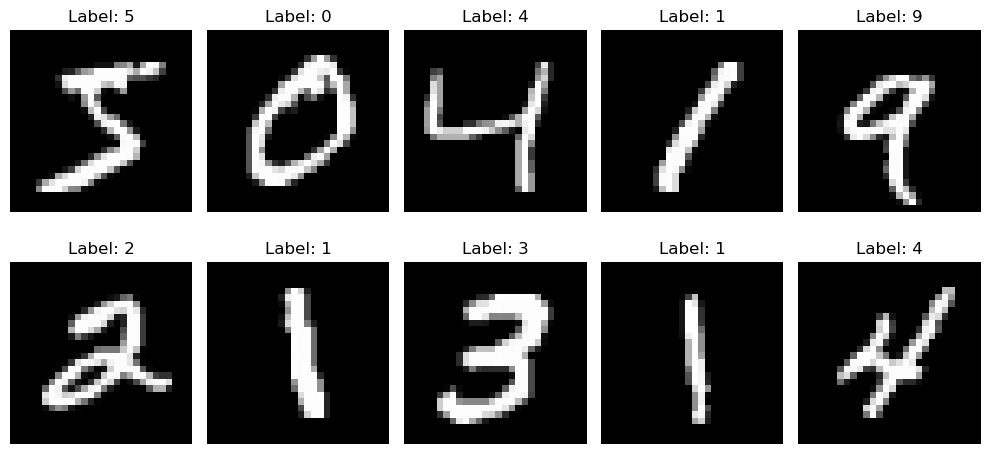

In [11]:
# Display the first 10 images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [12]:
#Normalize pixel values from 0-255 to 0-1

train_images, test_images = train_images/255, test_images/255

In [13]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu,
                                 input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.summary()

model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [14]:
model.fit(train_images,train_labels, epochs=1)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0565 - accuracy: 0.9829
0.9829000234603882


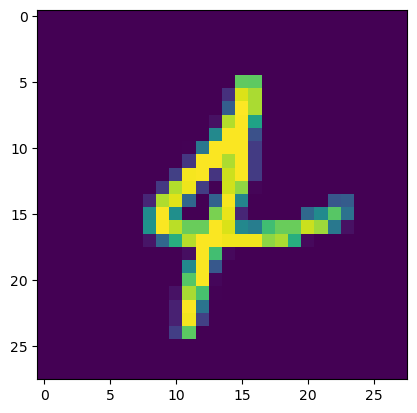

In [15]:
### predict the label of one image

test_image = np.expand_dims(test_images[300], axis = 0)
plt.imshow(test_image.reshape(28,28))
plt.show()

In [16]:
result = model.predict(test_image)
print("result:", result)
print("result.argmax():", result.argmax())

1/1 [==============================] - 0s 83ms/step
result: [[4.0944820e-04 1.0399410e-04 1.4162944e-02 2.9002123e-05 9.8365039e-01
  7.9718836e-07 3.6761918e-04 1.9466323e-04 1.0568461e-03 2.4307981e-05]]
result.argmax(): 4
